In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path_data="MAUS/Data/IBI_sequence/"
path_labels="MAUS/Subjective_rating/"
path_record="MAUS/Data/Raw_data/"
sub_id = ["002", "003", "004", "005", "006", "008", "010", "011", "012", "013", "014", "015", "016", "017", "018", "019", "020", "021", "022", "023", "024", "025"]


def parse_labels_nasa(path):
    labels_nasa=[]
    cols=['Trial 1:0back', 'Trial 2:2back', 'Trial 3:3back','Trial 4:2back', 'Trial 5:3back', 'Trial 6:0back']
    for id in sub_id:
        answer=pd.read_csv(path+id+"/NASA_TLX.csv", header=0, index_col = False, skipfooter=2)
        labels_nasa.append(answer)
    return labels_nasa


def parse_record(path):
    records=[]
    for id in sub_id:
        test=pd.read_excel(path+id+"/record.xlsx")
        records.append(test)
    return records


def parse_PSQI(path):
    PSQI=[]
    for id in sub_id:
        answer=pd.read_csv(path+id+"/PSQI.csv")
        PSQI.append(answer)
    return PSQI

In [ ]:
labels_nasa = parse_labels_nasa(path_labels)
records = parse_record(path_record)
PSQI = parse_PSQI(path_labels)

In [4]:
PSQI[1]

,PSQI
0,9


In [21]:
True_rate={}

for k in range (len(records)) : 
    True_rate[f'sujet n°{k+1}']={}
    moy=0
    for i in range (1,7) : 
        bonnerep=0
        rep_sujet=records[k][('b' + str(i) +'.Rsp')]
        rep_true=records[k][('b' + str(i) +'.CRsp')]

        if i==1 or i==6 :
            for j in range(len(rep_sujet)-1) :
                    if rep_sujet[j] == 1 : bonnerep +=1
            rate = bonnerep/(len(rep_sujet)-1)
            True_rate[f'sujet n°{k+1}'][('Trial ' + str(i))] = rate
            moy+=rate

        else :
            for j in range(len(rep_sujet)-1) :
                if rep_sujet[j]==rep_true[j] : bonnerep+=1
            rate = bonnerep/(len(rep_sujet)-1)
            True_rate[f'sujet n°{k+1}'][('Trial ' + str(i))] = rate
            moy+=rate

    True_rate[f'sujet n°{k+1}']['avr']=moy/6
    

In [22]:
True_rate

{'sujet n°1': {'Trial 1': 1.0,
  'Trial 2': 0.91,
  'Trial 3': 0.87,
  'Trial 4': 0.94,
  'Trial 5': 0.83,
  'Trial 6': 1.0,
  'avr': 0.9249999999999999},
 'sujet n°2': {'Trial 1': 1.0,
  'Trial 2': 0.98,
  'Trial 3': 0.81,
  'Trial 4': 1.0,
  'Trial 5': 0.89,
  'Trial 6': 1.0,
  'avr': 0.9466666666666667},
 'sujet n°3': {'Trial 1': 1.0,
  'Trial 2': 0.94,
  'Trial 3': 0.91,
  'Trial 4': 0.92,
  'Trial 5': 0.96,
  'Trial 6': 1.0,
  'avr': 0.9550000000000001},
 'sujet n°4': {'Trial 1': 1.0,
  'Trial 2': 1.0,
  'Trial 3': 1.0,
  'Trial 4': 1.0,
  'Trial 5': 1.0,
  'Trial 6': 1.0,
  'avr': 1.0},
 'sujet n°5': {'Trial 1': 1.0,
  'Trial 2': 1.0,
  'Trial 3': 1.0,
  'Trial 4': 0.99,
  'Trial 5': 1.0,
  'Trial 6': 0.99,
  'avr': 0.9966666666666667},
 'sujet n°6': {'Trial 1': 1.0,
  'Trial 2': 0.99,
  'Trial 3': 0.91,
  'Trial 4': 1.0,
  'Trial 5': 0.99,
  'Trial 6': 1.0,
  'avr': 0.9816666666666666},
 'sujet n°7': {'Trial 1': 1.0,
  'Trial 2': 0.99,
  'Trial 3': 0.96,
  'Trial 4': 0.99,
  'Tr

In [37]:
labels_nasa[0]

,Scale Title,Trial 1: 0_back,Trial 2: 2_back,Trial 3: 3_back,Trial 4: 2_back,Trial 5: 3_back,Trial 6: 0_back,Weight,overall_rate
0,Mental Demand,5,10,50,10,45,0,5,20.000000
1,Physical Demand,5,5,5,5,5,0,0,4.166667
2,Temporal Demand,5,5,5,10,15,5,2,7.500000
3,Performance,0,0,5,0,5,0,3,1.666667
4,Effort,5,10,50,10,35,0,4,18.333333


In [36]:
for k in range (len(labels_nasa)) :
    labels_nasa[k]['overall_rate'] = (labels_nasa[k]['Trial 1: 0_back'] + labels_nasa[k]['Trial 2: 2_back'] + labels_nasa[k]['Trial 3: 3_back'] + labels_nasa[k]['Trial 4: 2_back'] + labels_nasa[k]['Trial 5: 3_back'] + labels_nasa[k]['Trial 6: 0_back']) / 6

In [38]:
overall_scores=[]
for k in range (len(labels_nasa)) :
    overall_scores.append(sum(labels_nasa[k]['Weight'] * labels_nasa[k]['overall_rate'])/sum(labels_nasa[k]['Weight']))

In [39]:
overall_scores

[13.809523809523808,
 44.77777777777778,
 40.333333333333336,
 7.611111111111112,
 13.61111111111111,
 31.666666666666668,
 22.61111111111111,
 48.166666666666664,
 45.94444444444444,
 30.444444444444443,
 12.722222222222223,
 49.5,
 64.16666666666667,
 36.333333333333336,
 14.38888888888889,
 25.0,
 42.55555555555556,
 39.5,
 13.222222222222221,
 51.44444444444444,
 28.61111111111111,
 41.0]

In [9]:
record = pd.read_csv("MAUS_dataset/Data/Raw_data/002/record.csv", delimiter=";")
record

,time,b1.Rsp,b1.CRsp,b1.RT,time.1,b2.Rsp,b2.CRsp,b2.RT,time.2,b3.Rsp,...,b4.CRsp,b4.RT,time.4,b5.Rsp,b5.CRsp,b5.RT,time.5,b6.Rsp,b6.CRsp,b6.RT
0,2019_5_24_12_53_24.718,1.0,0.0,1378.0,2019_5_24_13_0_45.122,0.0,0.0,0.0,2019_5_24_13_8_2.192,0.0,...,0.0,0.0,2019_5_24_13_22_34.281,0.0,0.0,0.0,2019_5_24_13_29_47.499,1.0,0.0,532.0
1,2019_5_24_12_53_27.753,1.0,0.0,407.0,2019_5_24_13_0_48.157,1.0,0.0,1435.0,2019_5_24_13_8_5.226,0.0,...,0.0,0.0,2019_5_24_13_22_37.315,0.0,0.0,0.0,2019_5_24_13_29_50.533,1.0,1.0,282.0
2,2019_5_24_12_53_30.787,1.0,0.0,333.0,2019_5_24_13_0_51.191,0.0,0.0,0.0,2019_5_24_13_8_8.261,0.0,...,1.0,663.0,2019_5_24_13_22_40.349,0.0,0.0,0.0,2019_5_24_13_29_53.568,1.0,0.0,255.0
3,2019_5_24_12_53_33.821,1.0,0.0,363.0,2019_5_24_13_0_54.225,0.0,0.0,0.0,2019_5_24_13_8_11.295,1.0,...,0.0,981.0,2019_5_24_13_22_43.383,0.0,0.0,0.0,2019_5_24_13_29_56.602,1.0,0.0,325.0
4,2019_5_24_12_53_36.857,1.0,0.0,456.0,2019_5_24_13_0_57.26,1.0,1.0,708.0,2019_5_24_13_8_14.329,0.0,...,0.0,0.0,2019_5_24_13_22_46.418,0.0,0.0,0.0,2019_5_24_13_29_59.636,1.0,0.0,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019_5_24_12_58_16.009,1.0,0.0,327.0,2019_5_24_13_5_36.413,0.0,0.0,0.0,2019_5_24_13_12_53.483,1.0,...,0.0,0.0,2019_5_24_13_27_25.571,1.0,0.0,868.0,2019_5_24_13_34_38.79,1.0,0.0,241.0
97,2019_5_24_12_58_19.044,1.0,0.0,309.0,2019_5_24_13_5_39.448,0.0,0.0,0.0,2019_5_24_13_12_56.517,0.0,...,0.0,0.0,2019_5_24_13_27_28.606,1.0,1.0,721.0,2019_5_24_13_34_41.824,1.0,0.0,286.0
98,2019_5_24_12_58_22.078,1.0,1.0,298.0,2019_5_24_13_5_42.482,0.0,0.0,0.0,2019_5_24_13_12_59.551,0.0,...,0.0,0.0,2019_5_24_13_27_31.64,0.0,0.0,0.0,2019_5_24_13_34_44.858,1.0,1.0,412.0
99,2019_5_24_12_58_25.112,1.0,0.0,280.0,2019_5_24_13_5_45.516,1.0,0.0,724.0,2019_5_24_13_13_2.586,0.0,...,0.0,0.0,2019_5_24_13_27_34.674,1.0,1.0,725.0,2019_5_24_13_34_47.893,1.0,0.0,330.0


In [23]:

scores_moy = [True_rate[f'sujet n°{k+1}']['avr'] for k in range(len(True_rate))]
PSQI_score=[PSQI[k]['PSQI'][0] for k in range(len(PSQI))]

In [20]:
scores_moy

[0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999,
 0.9249999999999999]

In [16]:
PSQI_score

[np.int64(5),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(5),
 np.int64(4),
 np.int64(7),
 np.int64(4),
 np.int64(11),
 np.int64(0),
 np.int64(5),
 np.int64(7),
 np.int64(6),
 np.int64(12),
 np.int64(7),
 np.int64(2),
 np.int64(6),
 np.int64(4),
 np.int64(5),
 np.int64(2),
 np.int64(5)]

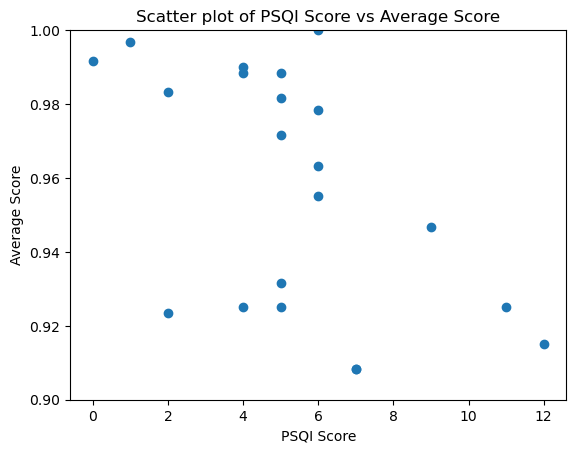

In [27]:
import matplotlib.pyplot as plt 
plt.scatter(PSQI_score, scores_moy)
plt.xlabel('PSQI Score')
plt.ylabel('Average Score')
plt.ylim(0.9, 1)
plt.title('Scatter plot of PSQI Score vs Average Score')
plt.show()

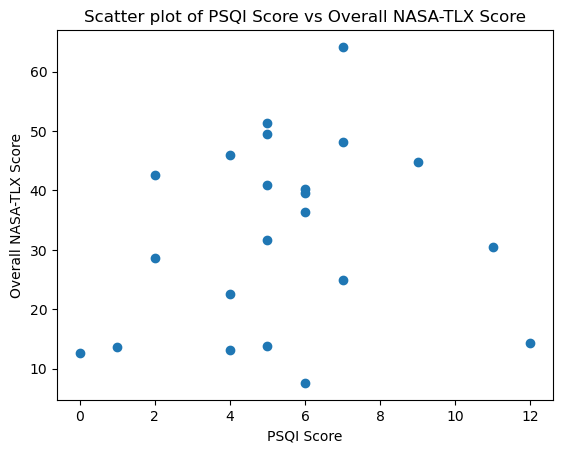

In [40]:
plt.scatter(PSQI, overall_scores)
plt.xlabel('PSQI Score')
plt.ylabel('Overall NASA-TLX Score')        
plt.title('Scatter plot of PSQI Score vs Overall NASA-TLX Score')
plt.show()

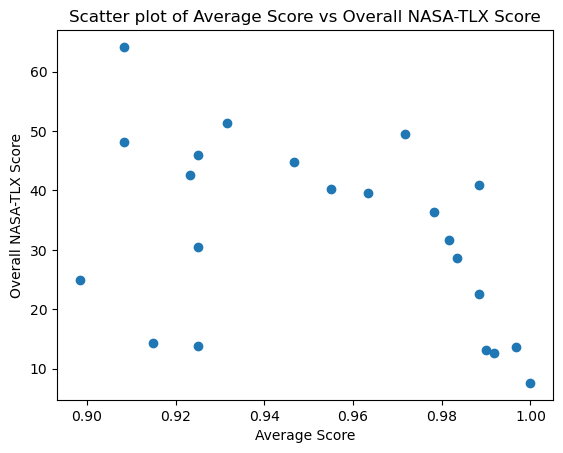

In [41]:
plt.scatter(scores_moy, overall_scores)
plt.xlabel('Average Score')
plt.ylabel('Overall NASA-TLX Score')
plt.title('Scatter plot of Average Score vs Overall NASA-TLX Score')
plt.show()